<a href="https://colab.research.google.com/github/Xmagnop/Classification-Algorithms/blob/main/Roteiro_Fuzzy_C_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem Não Supervisionada

Aprendizagem não supervisionada é uma técnica de machine learning onde o modelo é treinado usando dados que não possuem rótulos. Ao contrário da aprendizagem supervisionada, onde você tem dados de entrada e saída, na aprendizagem não supervisionada você tem apenas dados de entrada.

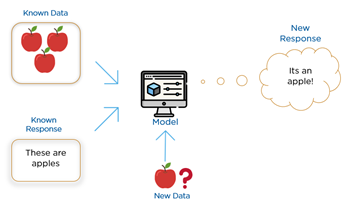

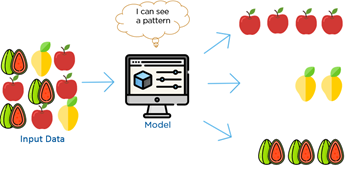

Principais Aplicações:

### Clustering
É uma técnica de mineração de dados que agrupa dados não rotulados com base em suas semelhanças ou diferenças. Algoritmos de armazenamento em cluster são usados para processar objetos de dados não classificados e brutos em grupos representados por estruturas ou padrões nas informações. Os algoritmos de armazenamento em cluster podem ser categorizados nos tipos a seguir:
* Exclusivos - É uma forma de agrupamento que estipula que um ponto de dados pode existir apenas em um cluster.
* Sobrepostos - Os clusters sobrepostos diferem do armazenamento em cluster exclusivo, no sentido de que permite que pontos de dados pertençam a vários clusters com níveis diferentes de filiação.
* Hierárquicos - O armazenamento em cluster hierárquico, também conhecido como análise de cluster hierárquico (HCA), é um algoritmo de clusterização não supervisionado que pode ser categorizado de duas formas, aglomerativo ou divisivo.
  * O armazenamento em cluster aglomerativo é considerado uma “abordagem de baixo para cima.” Seus pontos de dados são inicialmente isolados como agrupamentos separados e, em seguida, eles são mesclados iterativamente com base na similaridade até que um cluster seja alcançado.
  * O armazenamento em cluster divisivo pode ser definido como o oposto do armazenamento em cluster aglomerativo, pois ele adota uma abordagem “de cima para baixo”. Nesse caso, um único cluster de dados é dividido com base nas diferenças entre os pontos de dados.
* Probabilísticos - No armazenamento em cluster probabilístico, pontos de dados são agrupados com base na probabilidade de pertencerem a uma determinada distribuição.
- Redução de dimensionalidade
- Detecção de anomalias
- Análise de mercado

# Introdução ao Fuzzy C-means

O algoritmo Fuzzy C-means (FCM) é um método de agrupamento que permite que cada ponto de dados pertença a múltiplos clusters com diferentes graus de pertencimento.
Isso é especialmente útil em situações onde os limites entre os clusters não são bem definidos, como em dados com sobreposição.

- O FCM busca minimizar uma função de custo que considera a distância entre os pontos e os centros dos clusters, ponderada pelo grau de pertencimento de cada ponto a cada cluster.

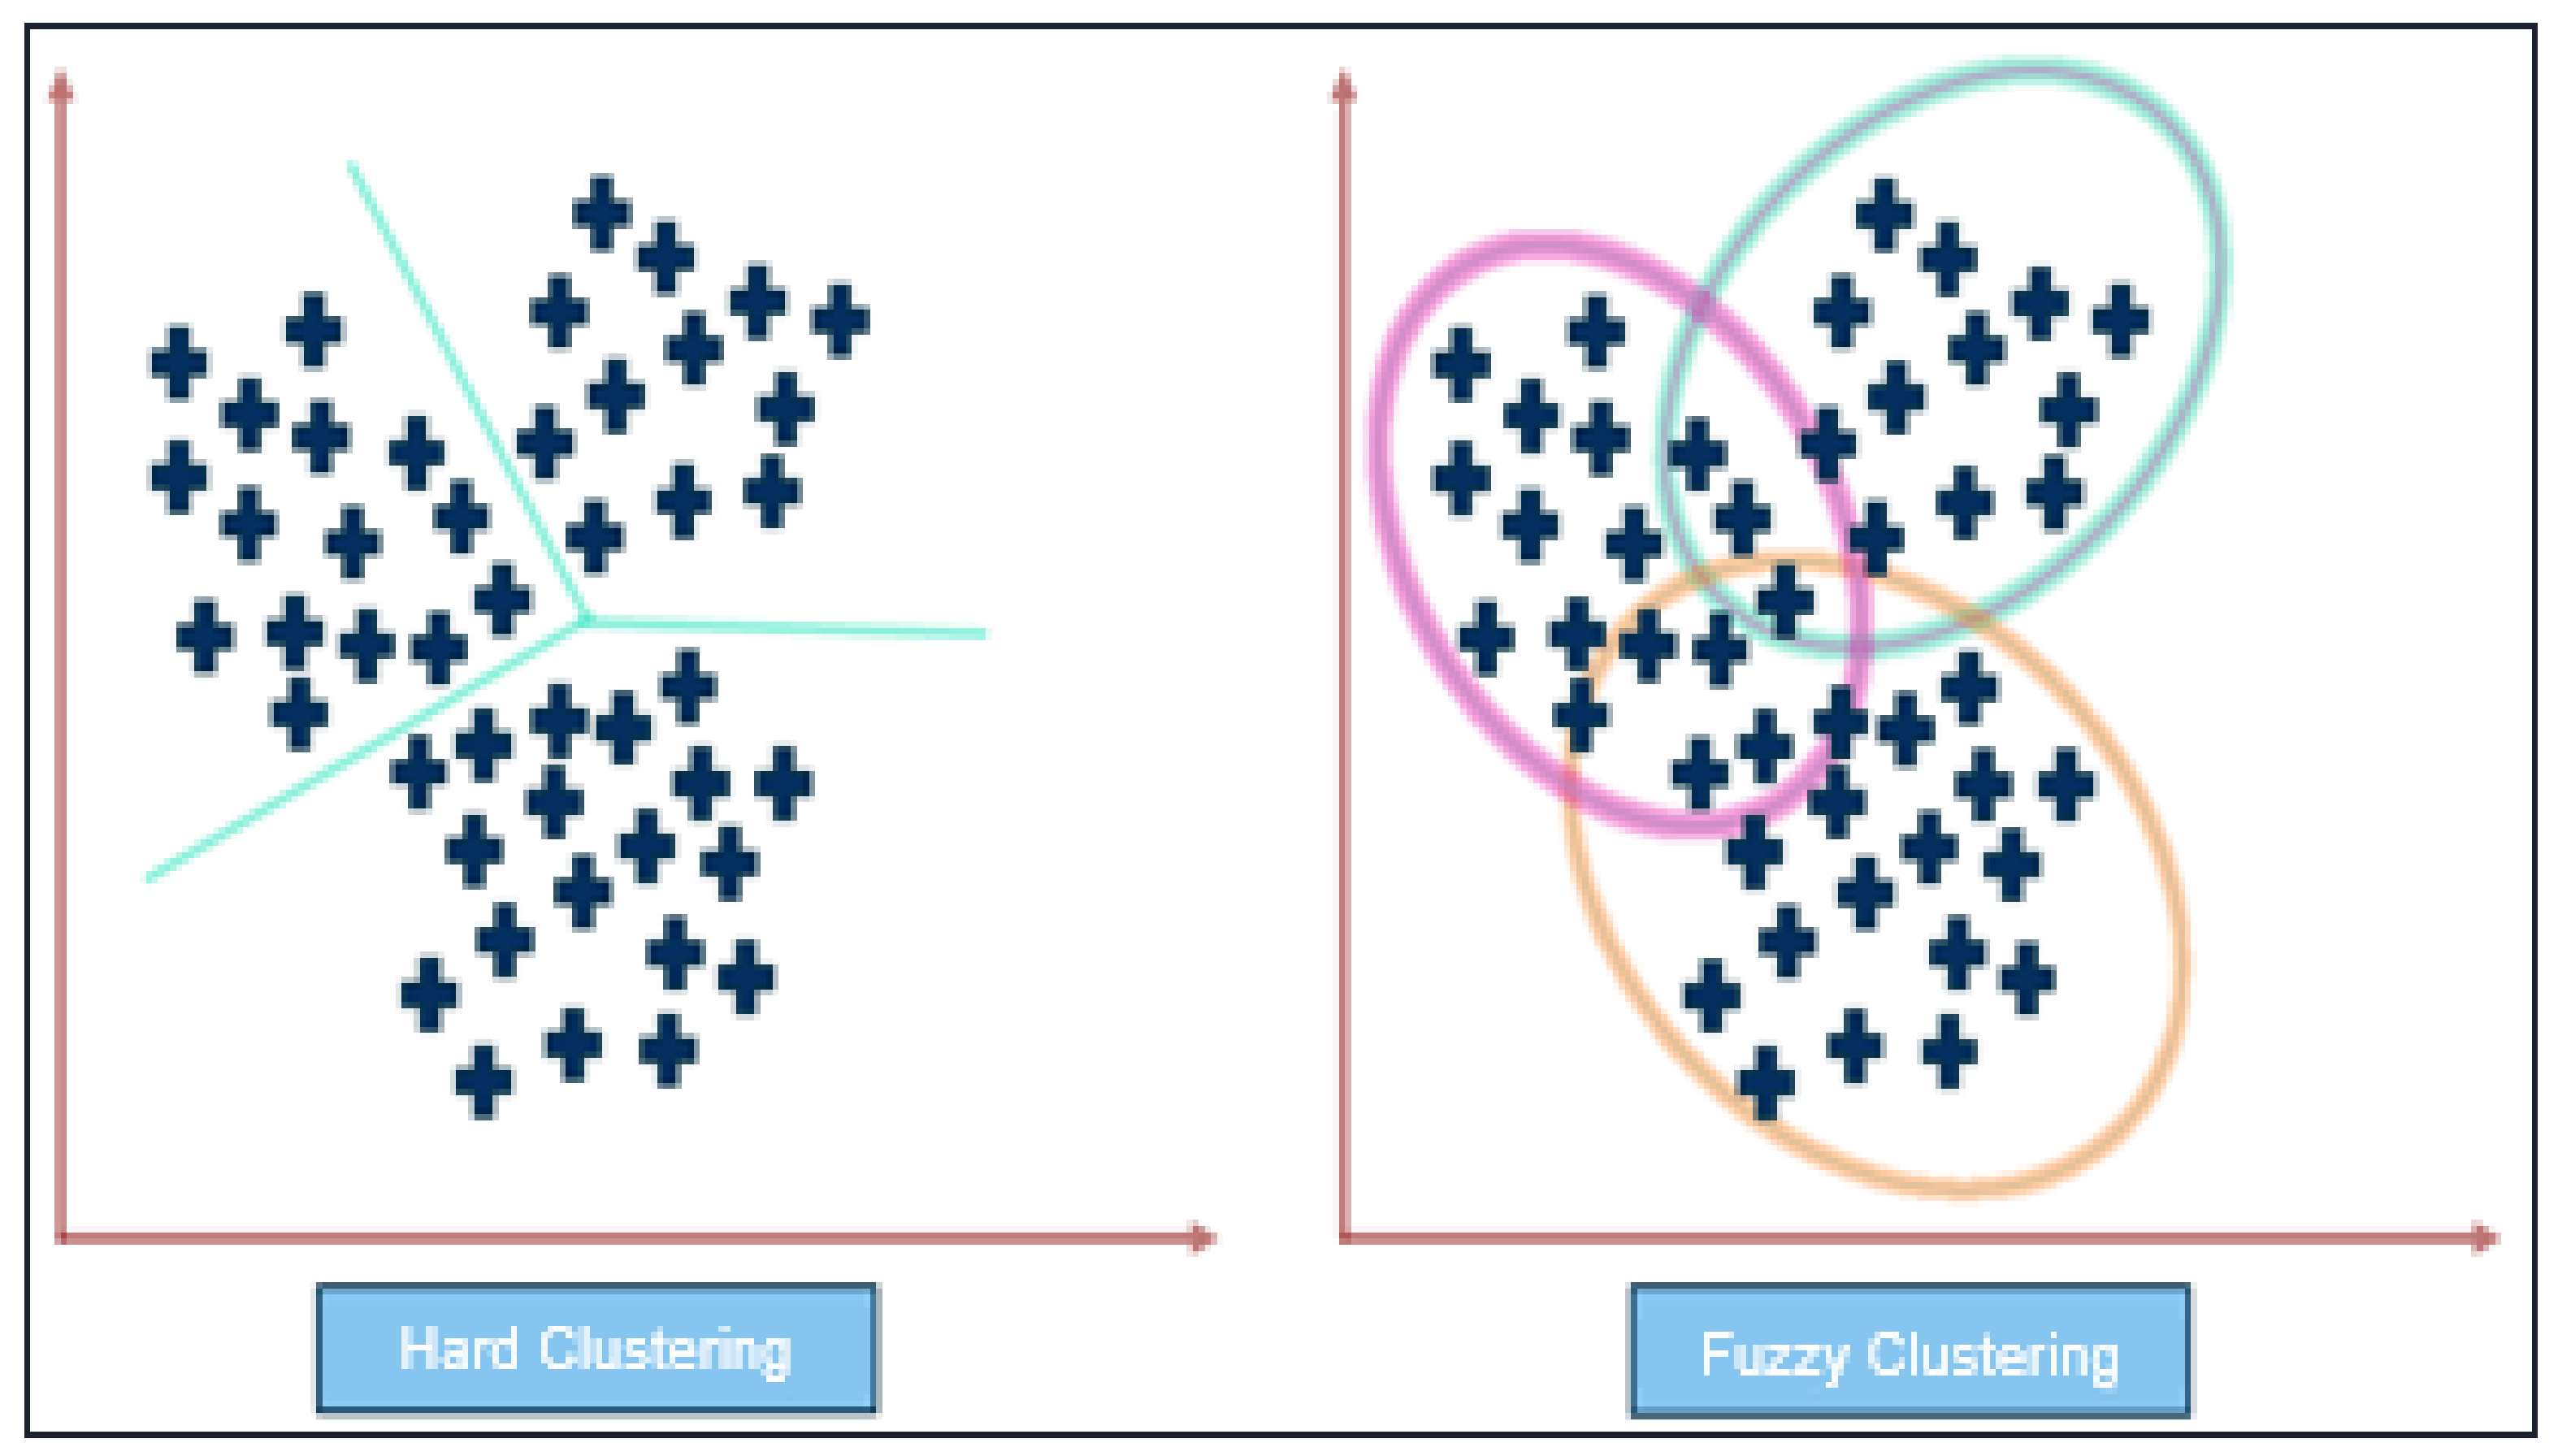

# Hands-On




## Instalação e Importação das Bibliotecas

In [ ]:
pip install fuzzy-c-means

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.12.5
    Uninstalling typer-0.12.5:
      Successfully uninstalled typer-0.12.5
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.19.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


Antes de começar a trabalhar com o algoritmo Fuzzy C-Means, é importante configurar o ambiente instalando e importando as bibliotecas necessárias. Vamos instalar as bibliotecas que serão usadas no processamento de dados, treinamento e avaliação do modelo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from fcmeans import FCM
import matplotlib.pyplot as plt
from IPython.display import display

- **numpy:** Uma biblioteca fundamental para computação científica em Python. Ela fornece suporte para arrays multidimensionais e funções matemáticas de alto desempenho.
- **pandas:** Usada para carregar, manipular e processar dados tabulares (como CSVs). Ela permite realizar operações de limpeza e preparação de dados de forma eficiente.
- **scikit-learn:** Biblioteca de aprendizado de máquina amplamente usada, que oferece ferramentas para processamento de dados, escalonamento e avaliação do modelo.
- **fcmeans:** Implementa o algoritmo Fuzzy C-Means, fornecendo métodos como fit(), predict() e centers para agrupar dados.
- **matplotlib:** Usada para criar gráficos e visualizações, permitindo observar os clusters e os centros gerados pelo Fuzzy C-Means.

## Onde obter os dados necessários para o problema a ser resolvido

Para qualquer algoritmo de machine learning, os dados são fundamentais. Para o Fuzzy C-Means, os dados podem vir de várias fontes, desde problemas de segmentação de clientes até segmentação de imagens.

- **UCI Machine Learning Repository:** Um repositório com diversos conjuntos de dados públicos, útil para experimentos e benchmarks.
- **Kaggle:** Oferece diversos datasets categorizados para diferentes tipos de problemas.
- **Sklearn Datasets:** A biblioteca scikit-learn oferece conjuntos de dados embutidos, como o dataset Iris.

## Como processar estes dados

O processamento de dados é uma etapa crucial, já que o Fuzzy C-Means depende da distância euclidiana para calcular a pertinência dos pontos aos clusters. Isso significa que seus dados precisam ser numéricos, limpos, e escalonados para garantir que cada feature tenha sua importância no modelo.

Carregar os dados com pandas:

In [ ]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Verificar quantas espécies diferentes existem
num_species = data['Species'].nunique()

# Contar quantos dados de cada espécie existem
species_counts = data['Species'].value_counts()

print(f"Existem {num_species} espécies diferentes no dataset.")
print("Contagem de dados por espécie:")
display(species_counts)

# Remover a coluna 'species'
data = data.drop(columns=['Species'])

display(data)

Existem 3 espécies diferentes no dataset.
Contagem de dados por espécie:


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


Lidar com dados ausentes: Dados ausentes podem comprometer o resultado de qualquer algoritmo de aprendizado de máquina

In [ ]:
# Checar se há valores ausentes em alguma coluna
missing_data = data[data.isnull().any(axis=1)]

# Se houver linhas ausentes, mostrá-las
if not missing_data.empty:
    print("Linhas com dados ausentes:")
    print(missing_data)
    display(missing_data)
else:
    print("Nenhuma linha com dados ausentes foi encontrada.")

# Excluir as linhas com dados ausentes
data = data.dropna()

Nenhuma linha com dados ausentes foi encontrada.


Escalonar os dados com MinMaxScaler: O FCM se baseia em distâncias euclidianas para a definição de clusters. Variáveis em escalas muito diferentes podem distorcer os resultados. O escalonamento, como a normalização (MinMaxScaler), assegura que todas as variáveis possam contribuir para a distância.

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


Quando trabalhamos com dados que incluem variáveis categóricas (por exemplo, "sexo", "tipo de produto", "cidade"), não podemos aplicar diretamente a normalização (scaling) nelas, pois essas variáveis não têm uma ordem ou magnitude significativa. Aplicar técnicas de escalonamento em variáveis categóricas poderia distorcer os resultados. Existem alternativas comuns para lidar com esses tipos de dados:

- One-Hot Encoding: Transforma cada categoria em uma nova coluna binária (0 ou 1), criando uma nova variável para cada categoria possível. Esta é uma técnica amplamente usada quando o número de categorias é pequeno e a relação entre as categorias não é ordinal.

- Label Encoding: Atribui um número inteiro a cada categoria. Essa técnica é rápida e eficiente, mas deve ser usada apenas se as categorias tiverem uma ordem implícita. Não é a melhor escolha quando as categorias são nominais (sem ordem), pois pode induzir o algoritmo a interpretar relações inexistentes entre os números.

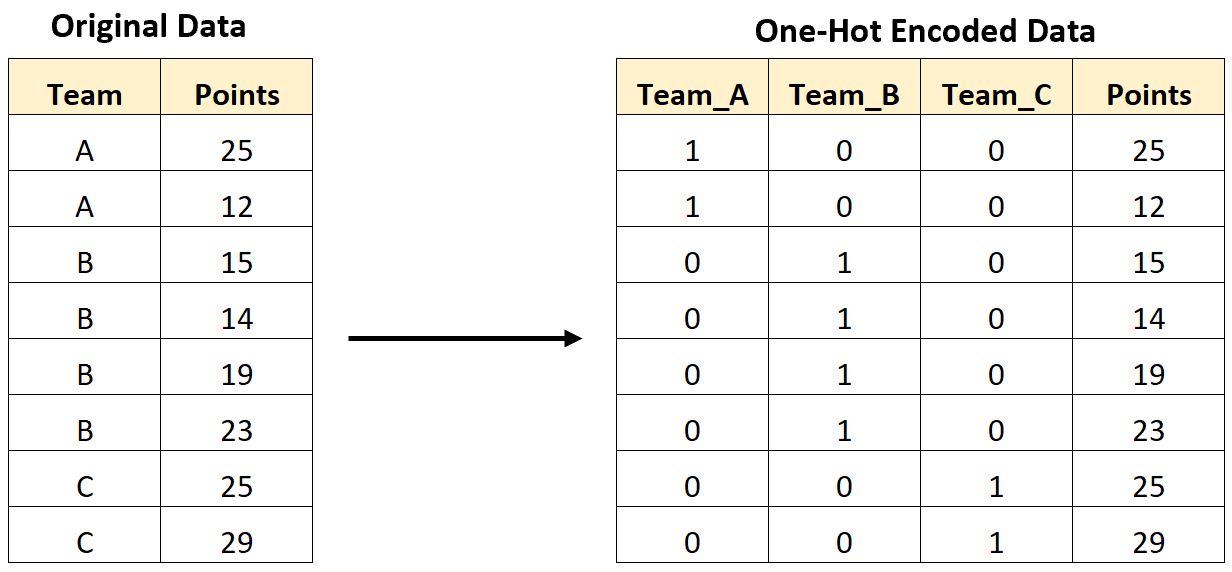

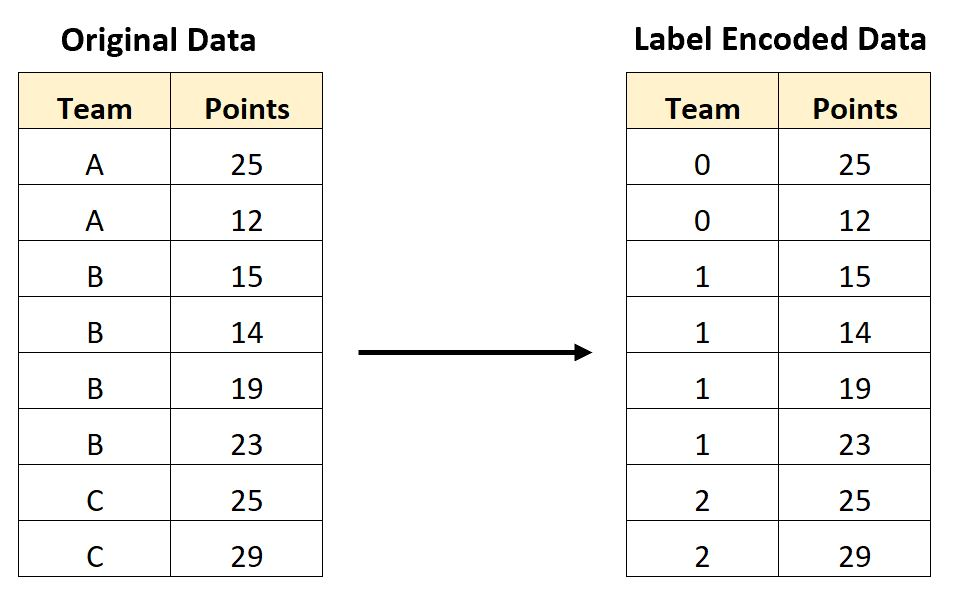

## Treinamento do Algoritmo

Ao instanciar o algoritmo, é importante definir o número de clusters. O número de clusters depende do problema e pode ser ajustado através de testes por tentativa e erro ou métodos de validação cruzada.

In [ ]:
fcm = FCM(n_clusters=3)  # Defina o número de clusters apropriado para seu problema
fcm.fit(data_scaled)

Predição e obtenção dos resultados: Após treinar o modelo, você pode usar o método predict() para obter a classificação fuzzy dos dados, ou seja, a probabilidade de cada ponto pertencer a cada cluster.

## Como salvar os resultados obtidos

Após o treinamento, os rótulos dos clusters e os centros podem salvos para serem usados posteriormente para análises e avaliações, além de facilitar a comparação com outros algoritmos de clustering.

- **Rótulos dos Clusters:** Esses rótulos indicam o cluster ao qual cada ponto de dados tem a maior pertinência.

In [ ]:
labels = fcm.predict(data_scaled)
results = pd.DataFrame({'Cluster': labels})
results.to_csv('resultados_clusters.csv', index=False)


- **Centros dos Clusters:** Salve as coordenadas dos centros de cada cluster.

In [ ]:
centers = fcm.centers
centers_df = pd.DataFrame(centers)
centers_df.to_csv('centros_clusters.csv', index=False)


## Realizar a detecção/avaliação com base nos resultados do modelo treinado

Com os resultados obtidos, você pode realizar a visualização e avaliação da performance do modelo. Essas etapas são importantes para interpretar a qualidade do agrupamento fuzzy.

- **Visualizar os Clusters:**

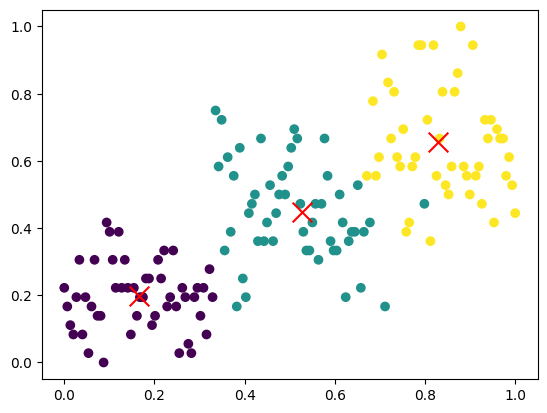

In [ ]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='x')  # Centros
plt.show()


- **Analisar a matriz de pertinência:** Essa matriz contém a probabilidade de cada ponto de dados pertencer a cada cluster. Ela é o coração do Fuzzy C-Means.

In [ ]:
membership_matrix = fcm.u
membership_df = pd.DataFrame(membership_matrix)
membership_df.to_csv('matriz_pertinencia.csv', index=False)


- **Avaliar o modelo com métricas:** A métrica de Silhouette Score é útil para avaliar a separação dos clusters. Quanto maior o valor, melhor a definição dos clusters.

In [ ]:
silhouette_avg = silhouette_score(data_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5203621486676548
